In [203]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    roc_curve, 
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

In [159]:
data = pd.read_csv("CollegePlacement.csv")
data

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [161]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [162]:
data.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [163]:
counts = data['Placement'].value_counts
counts

<bound method IndexOpsMixin.value_counts of 0        No
1        No
2        No
3        No
4        No
       ... 
9995    Yes
9996     No
9997     No
9998     No
9999     No
Name: Placement, Length: 10000, dtype: object>

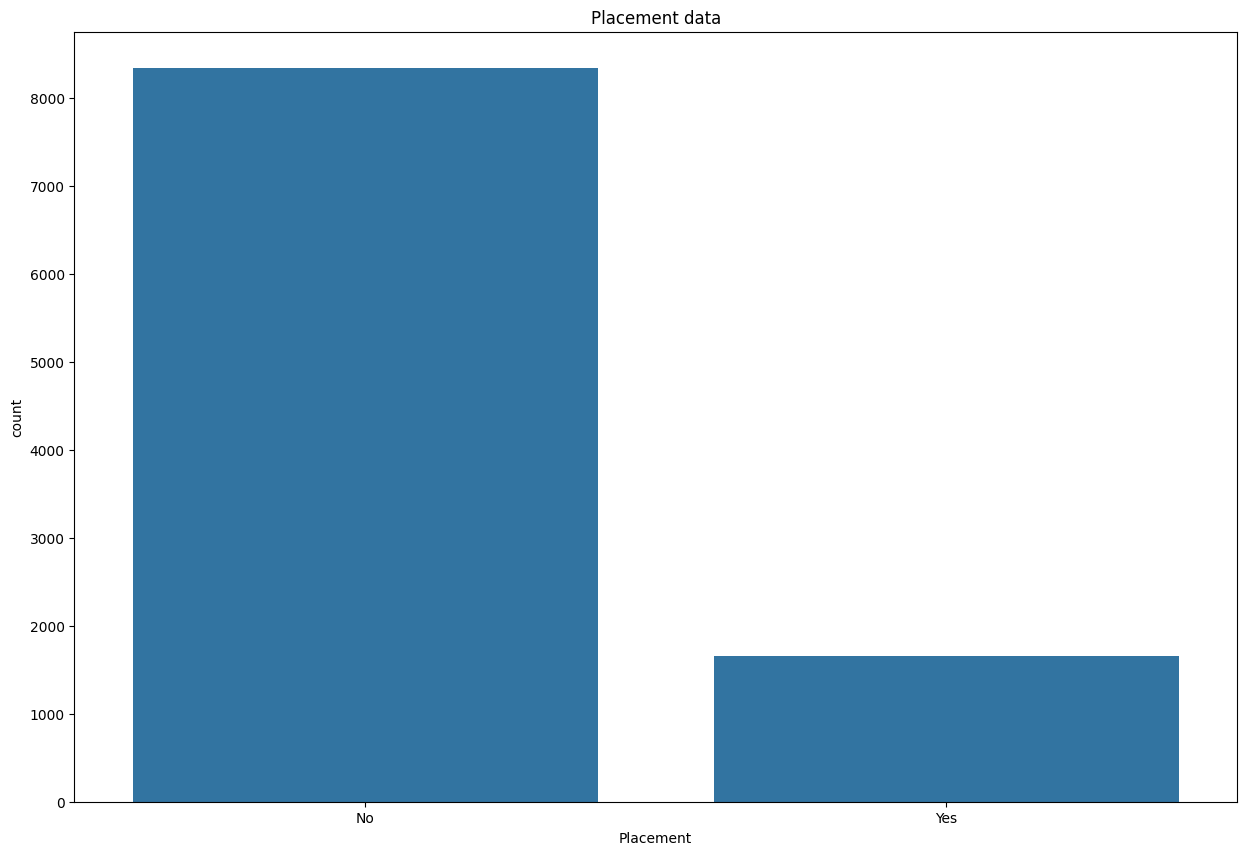

In [164]:
sns.countplot(x='Placement', data=data)
plt.title("Placement data")
plt.show()

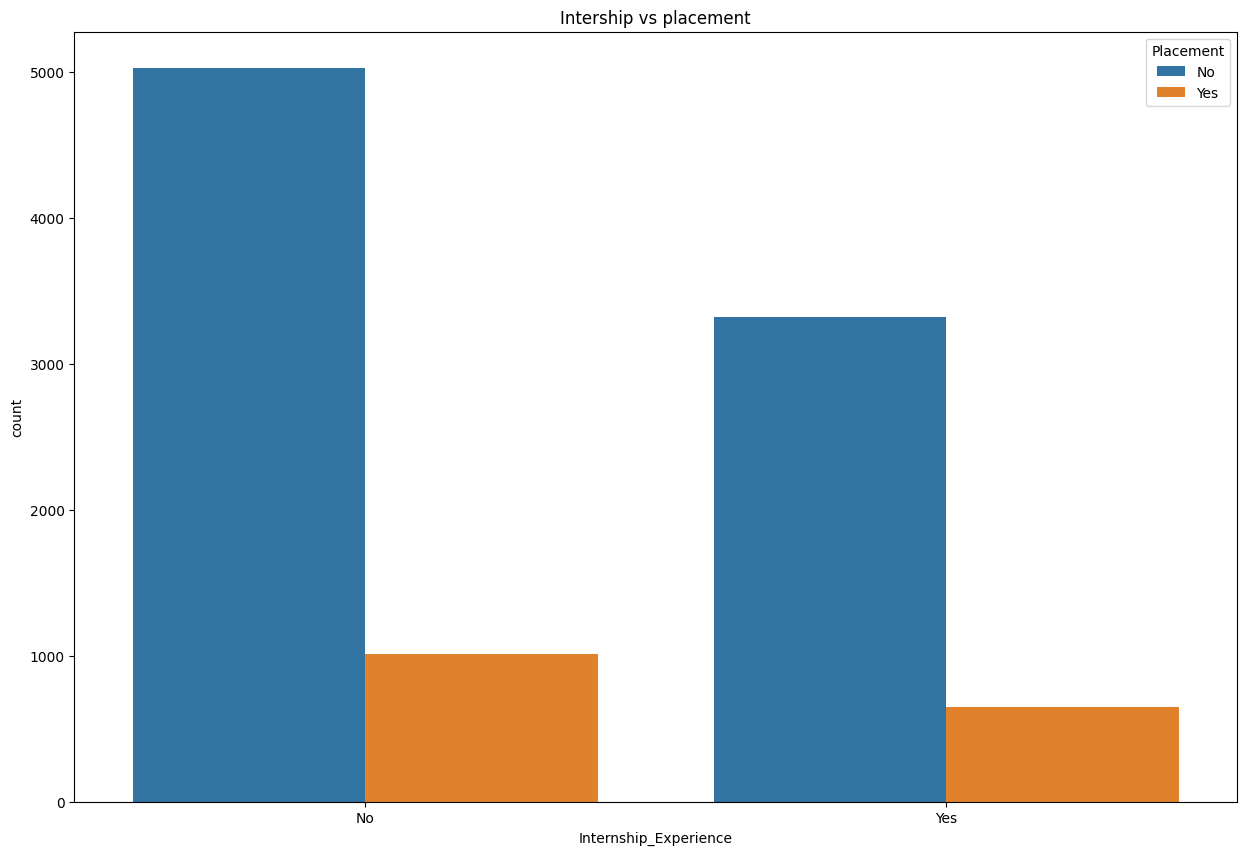

In [165]:
sns.countplot(x='Internship_Experience', hue='Placement', data=data)
plt.title("Intership vs placement")
plt.show()

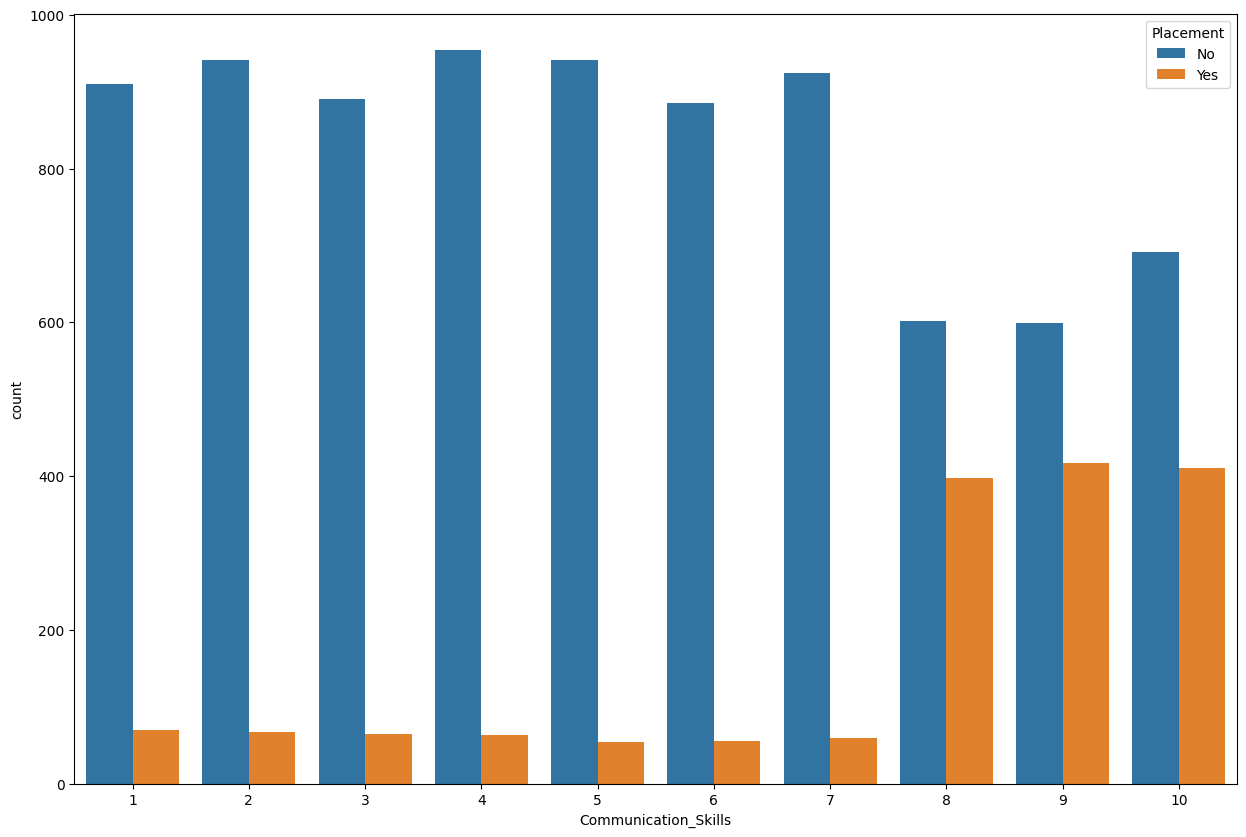

In [166]:
sns.countplot(
    x = 'Communication_Skills',
    hue = 'Placement',
    data = data
)
plt.show()

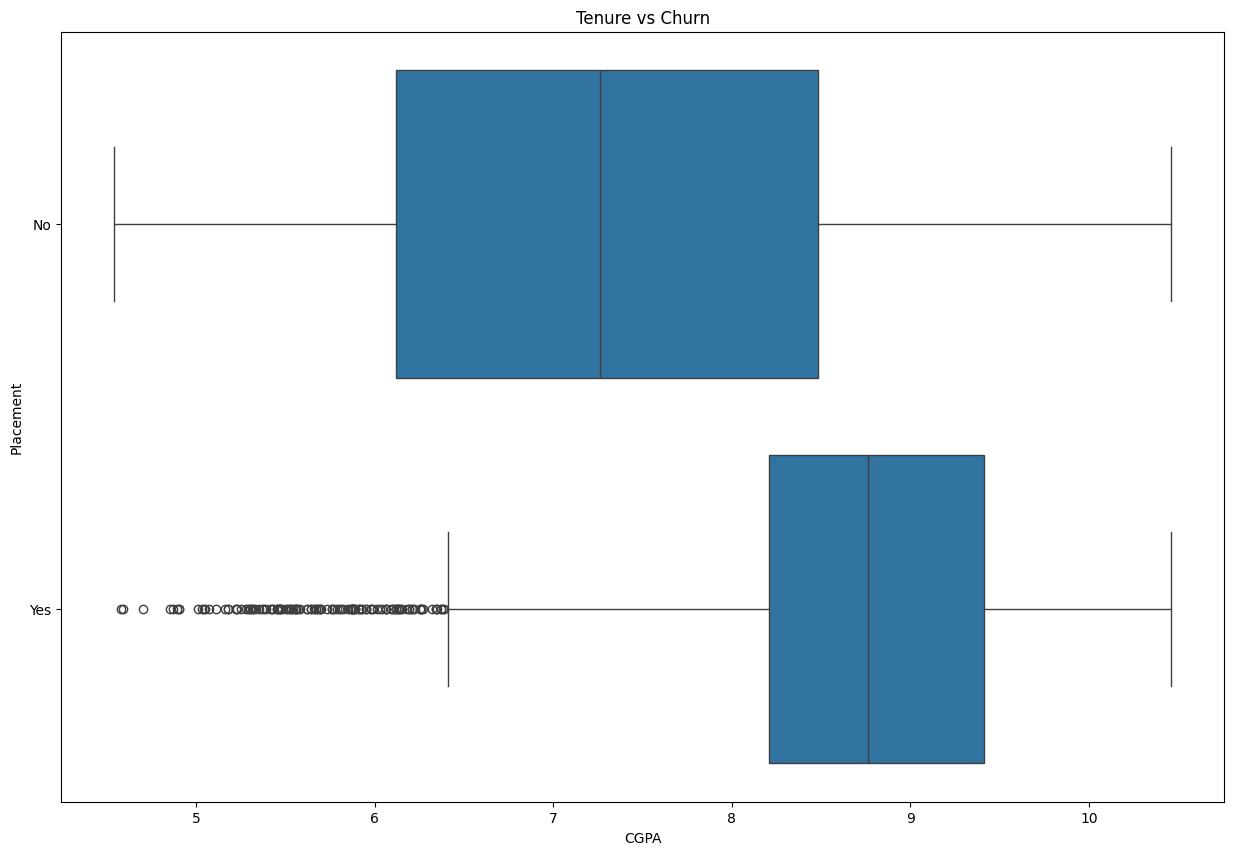

In [167]:
sns.boxplot(x='CGPA', y='Placement', data=data)
plt.title("Tenure vs Churn")
plt.show()

In [168]:
df = data.drop(columns=['College_ID'])
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes
9996,70,9.25,9.34,7,No,0,7,2,No
9997,89,6.08,6.25,3,Yes,3,9,5,No
9998,107,8.77,8.92,3,No,7,5,1,No


In [169]:
le = LabelEncoder()
df['Internship_data'] = le.fit_transform(df['Internship_Experience'])
df


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Internship_data
0,107,6.61,6.28,8,No,8,8,4,No,0
1,97,5.52,5.37,8,No,7,8,0,No,0
2,109,5.36,5.83,9,No,3,1,1,No,0
3,122,5.47,5.75,6,Yes,1,6,1,No,1
4,96,7.91,7.69,7,No,8,10,2,No,0
...,...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes,0
9996,70,9.25,9.34,7,No,0,7,2,No,0
9997,89,6.08,6.25,3,Yes,3,9,5,No,1
9998,107,8.77,8.92,3,No,7,5,1,No,0


In [170]:
df['Placement_data'] = le.fit_transform(df["Placement"])
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Internship_data,Placement_data
0,107,6.61,6.28,8,No,8,8,4,No,0,0
1,97,5.52,5.37,8,No,7,8,0,No,0,0
2,109,5.36,5.83,9,No,3,1,1,No,0,0
3,122,5.47,5.75,6,Yes,1,6,1,No,1,0
4,96,7.91,7.69,7,No,8,10,2,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes,0,1
9996,70,9.25,9.34,7,No,0,7,2,No,0,0
9997,89,6.08,6.25,3,Yes,3,9,5,No,1,0
9998,107,8.77,8.92,3,No,7,5,1,No,0,0


In [171]:
data_new = df.drop(columns = ["Placement", "Internship_Experience"])
data_new

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_data,Placement_data
0,107,6.61,6.28,8,8,8,4,0,0
1,97,5.52,5.37,8,7,8,0,0,0
2,109,5.36,5.83,9,3,1,1,0,0
3,122,5.47,5.75,6,1,6,1,1,0
4,96,7.91,7.69,7,8,10,2,0,0
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,1,8,0,0,1
9996,70,9.25,9.34,7,0,7,2,0,0
9997,89,6.08,6.25,3,3,9,5,1,0
9998,107,8.77,8.92,3,7,5,1,0,0


In [172]:
data_new.corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_data,Placement_data
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.003458,-0.010896,0.014538,-0.000247,0.285914
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434,-0.013347,0.317896
CGPA,-0.002859,0.980768,1.000000,-0.002958,0.011441,-0.018242,0.020872,-0.012562,0.321607
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.011774,-0.019733,-0.013148,0.025903,-0.014920
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,1.000000,0.003769,0.008122,0.002093,-0.004740
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,0.003769,1.000000,-0.004486,-0.020437,0.323155
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,0.008122,-0.004486,1.000000,-0.010260,0.217499
Internship_data,-0.000247,-0.013347,-0.012562,0.025903,0.002093,-0.020437,-0.010260,1.000000,-0.005841
Placement_data,0.285914,0.317896,0.321607,-0.014920,-0.004740,0.323155,0.217499,-0.005841,1.000000


In [173]:
data_new.corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_data,Placement_data
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.003458,-0.010896,0.014538,-0.000247,0.285914
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434,-0.013347,0.317896
CGPA,-0.002859,0.980768,1.000000,-0.002958,0.011441,-0.018242,0.020872,-0.012562,0.321607
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.011774,-0.019733,-0.013148,0.025903,-0.014920
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,1.000000,0.003769,0.008122,0.002093,-0.004740
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,0.003769,1.000000,-0.004486,-0.020437,0.323155
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,0.008122,-0.004486,1.000000,-0.010260,0.217499
Internship_data,-0.000247,-0.013347,-0.012562,0.025903,0.002093,-0.020437,-0.010260,1.000000,-0.005841
Placement_data,0.285914,0.317896,0.321607,-0.014920,-0.004740,0.323155,0.217499,-0.005841,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_12120\783128366.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


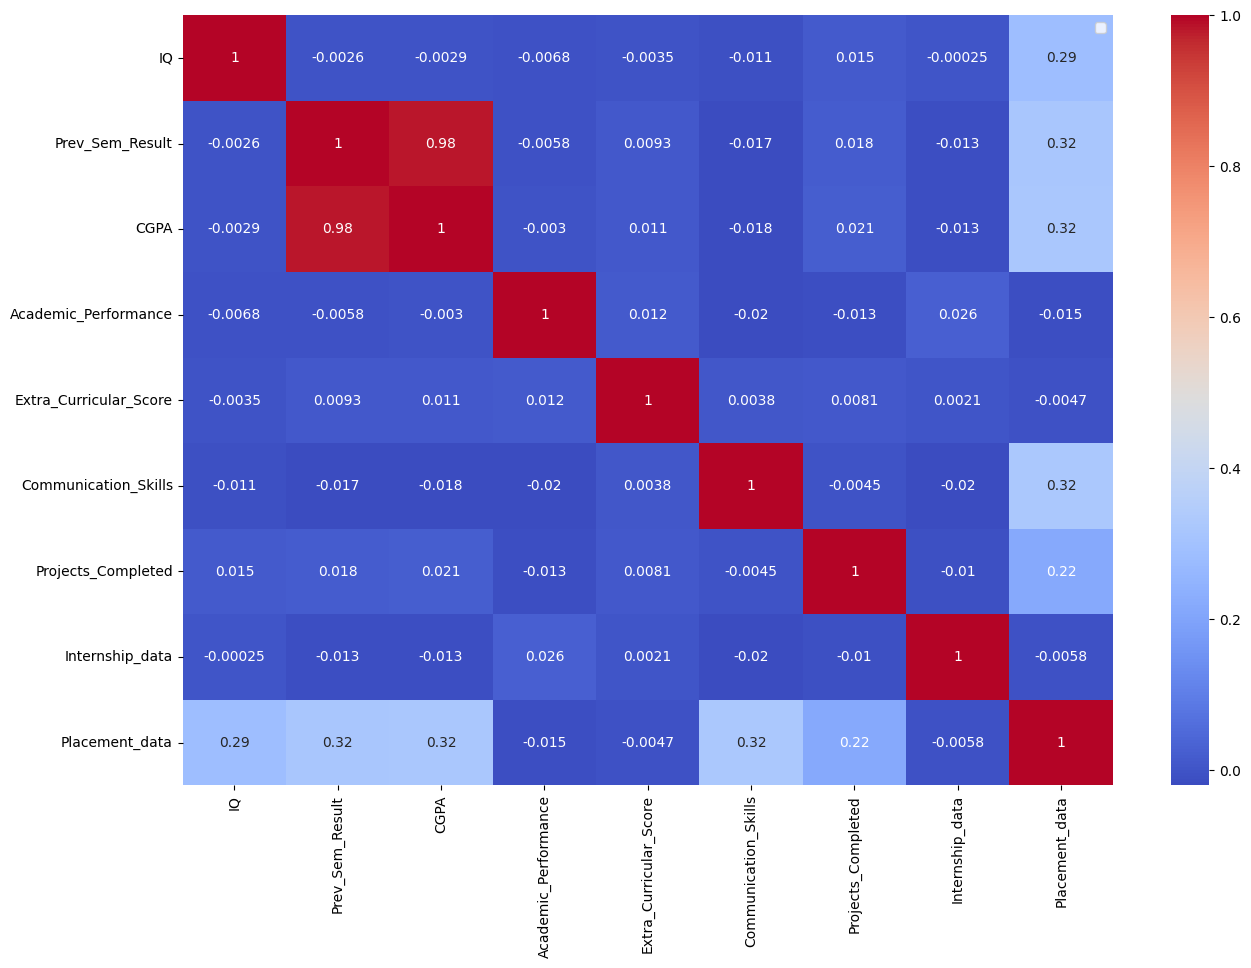

In [174]:

plt.Figure(figsize(15,10))
sns.heatmap(
    data_new.corr(),
    annot = True,
    cmap = 'coolwarm'
)
plt.legend()
plt.show()

In [175]:
X = data_new.iloc[:,:-1]
X

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_data
0,107,6.61,6.28,8,8,8,4,0
1,97,5.52,5.37,8,7,8,0,0
2,109,5.36,5.83,9,3,1,1,0
3,122,5.47,5.75,6,1,6,1,1
4,96,7.91,7.69,7,8,10,2,0
...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,1,8,0,0
9996,70,9.25,9.34,7,0,7,2,0
9997,89,6.08,6.25,3,3,9,5,1
9998,107,8.77,8.92,3,7,5,1,0


In [176]:
y = data_new.iloc[:,8]
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Placement_data, Length: 10000, dtype: int64

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [178]:
X_train

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_data
9069,110,8.29,8.25,3,2,2,4,0
2603,82,8.04,7.98,1,1,3,5,0
7738,103,9.59,9.30,2,5,6,3,1
1579,87,8.77,9.03,1,2,4,4,1
5058,97,5.83,5.61,8,5,6,3,1
...,...,...,...,...,...,...,...,...
5734,91,9.93,9.72,6,8,8,1,0
5191,99,7.74,7.36,9,7,10,0,0
5390,89,7.07,6.66,1,10,1,5,1
860,103,7.74,7.57,4,8,3,2,0


In [179]:
X_test

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Internship_data
6252,139,7.29,7.24,8,8,4,4,0
4684,84,8.28,8.49,8,3,3,5,1
1731,94,5.26,5.66,8,7,10,4,0
4742,100,6.22,6.29,6,8,6,3,1
4521,116,5.99,6.39,6,2,9,5,0
...,...,...,...,...,...,...,...,...
8014,94,7.39,7.85,4,10,3,4,0
1074,114,8.28,8.08,8,3,3,3,1
3063,92,8.92,9.05,2,6,10,3,0
6487,78,6.33,6.33,8,10,8,5,0


In [180]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    1
       ..
8014    0
1074    1
3063    1
6487    0
4705    1
Name: Placement_data, Length: 3000, dtype: int64

In [181]:
y_train

9069    0
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: Placement_data, Length: 7000, dtype: int64

In [182]:
model = LogisticRegression()

In [183]:
model.fit(X_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [184]:
y_predict = model.predict(X_test)

In [191]:
features = np.array([[16,5.99,6.39,6,2,10,5,0]])
res = model.predict(features)
if(res == 1):
    print("Placement can Happens")

else:
    print("Placement can't Happens")

Placement can't Happens


C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


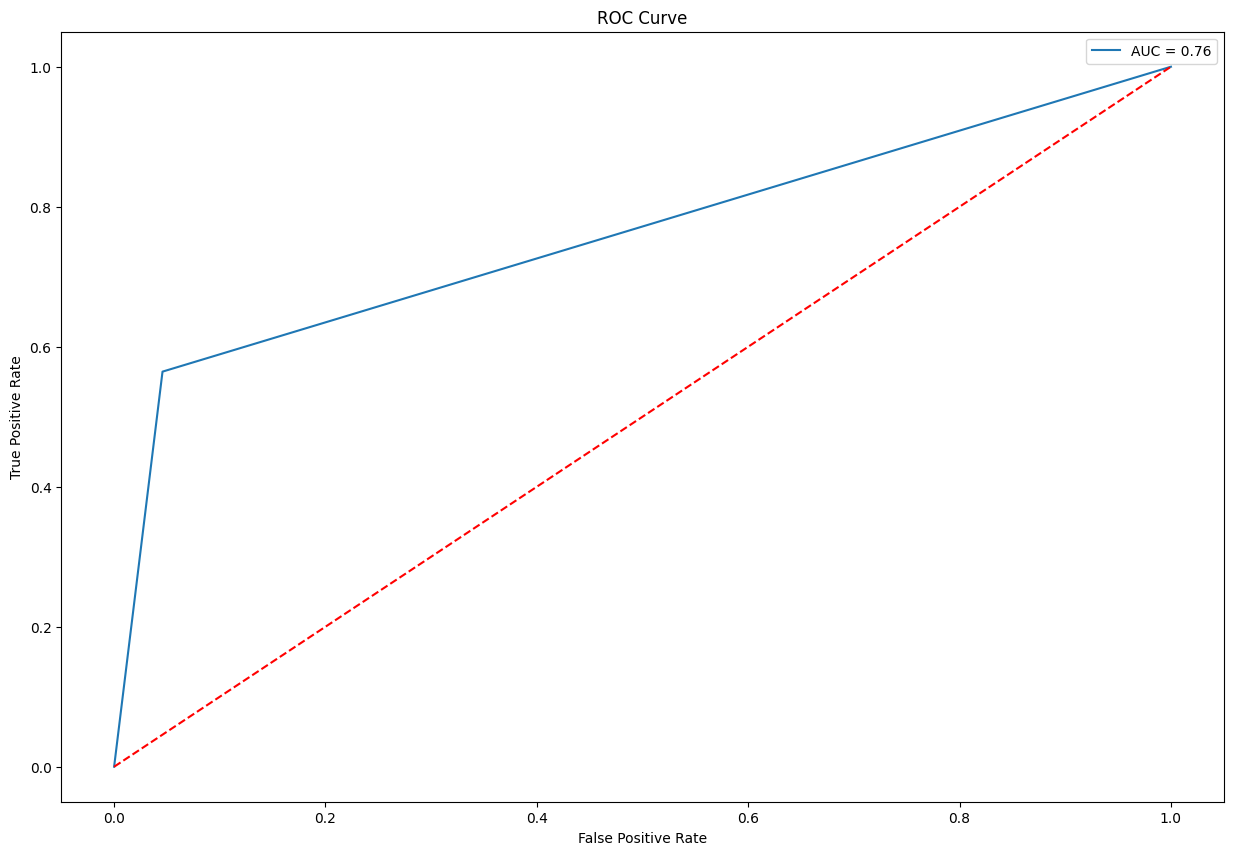

In [198]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

auc_score = roc_auc_score(y_test, y_predict)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [201]:
metrics = confusion_matrix(y_test, y_predict)
metrics

array([[2396,  115],
       [ 213,  276]])

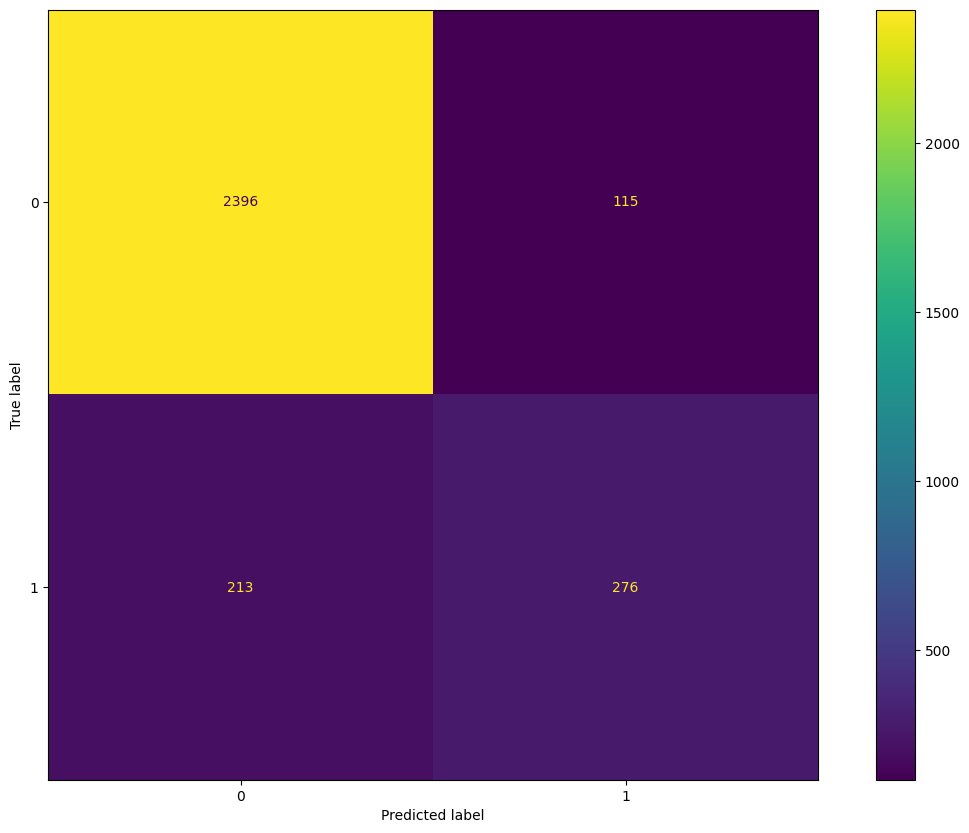

In [204]:
display = ConfusionMatrixDisplay(
    confusion_matrix = metrics,
    display_labels = [0,1]
)
display.plot()
plt.show()

In [205]:
Accuracy = accuracy_score(y_test, y_predict)
Precision = precision_score(y_test, y_predict)
Sensitivity_recall = recall_score(y_test, y_predict)
Specificity = recall_score(y_test, y_predict, pos_label=0)
F1_score = f1_score(y_test, y_predict)


In [206]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.8906666666666667, 'Precision': 0.7058823529411765, 'Sensitivity_recall': 0.5644171779141104, 'Specificity': 0.9542015133412983, 'F1_score': 0.6272727272727273}
